In [1]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df.drop_duplicates()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)


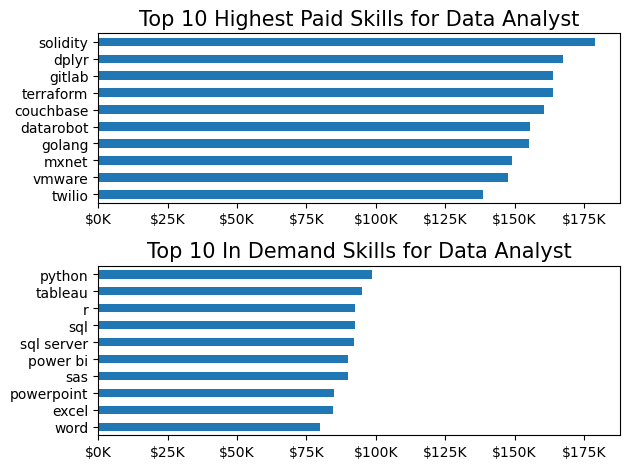

In [2]:
df_og = df.copy()

df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

df_da.dropna(subset = ['job_skills', 'salary_year_avg'], inplace = True)

import ast
df_da['job_skills'] = df_da['job_skills'].apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df_da_ex = df_da.explode("job_skills")

df_da_plot = df_da_ex.groupby(by = "job_skills").agg(
    median_salary = ('salary_year_avg', "median"),
    demand = ('job_skills', "size")
    )

# svn skill is outlier in the highest job pay so I am going to remove it from my analysis.
df_da_pay = df_da_plot.sort_values(by = "median_salary", ascending = False).drop("svn").head(10)
df_da_demand = df_da_plot.sort_values(by = "demand", ascending = False).head(10).sort_values(by = "median_salary", ascending = False)

fig, ax = plt.subplots(2, 1)

df_da_pay['median_salary'].plot(kind = 'barh', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst", fontsize = 15)
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))

df_da_demand['median_salary'].plot(kind = 'barh', ax = ax[1])
ax[1].invert_yaxis()
ax[1].set_title("Top 10 In Demand Skills for Data Analyst", fontsize = 15)
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()